# `Pandas`: dataframe manipulation, extraction, sorting, and an introduction to plotting with `matplotlib`

- continuing with `pandas` from week 12
- manipulating dataframes
- subsetting, summarizing, sorting, and building dataframes
- introduction to basic plotting with `matplotlib`

## Reading files straight into dataframe and examining dataframe object.

`pandas` is built to read, write, and manipulate dataframes, or mutliple dataframes. A dataframe is a two-dimensional tabular data structure with labeled axes (rows and columns). A `pandas` data frame consists of three elements: the data, rows, and columns. 

Step one is reading a file directly into a dataframe, which is simple as illustrated below. `.head()` can be used to preview the top five lines of the file, and `pandas` automatically treats column and row headers as read or inferred. The file we are reading in below contains a list of *Pinus muricata* populations across different regions along the coast of California, the only places on Earth where this species grows.

In [1]:
import pandas as pd

muricata_df = pd.read_csv('muricata_pops_lat_long.csv')
muricata_df.head()


region pop        lat        long
0    SCI  CH  34.003334 -119.614283
1    SCI  LO  34.003334 -119.614283
2    SCI  CP  34.013676 -119.797136
3    SOC  RR  34.013676 -119.797136
4    SLO  PB  34.024463 -119.692431

### Simple useful functions for describing dataframe:

There are many many built in functions for summarizing, manipulating, merging, and converting `pandas` dataframes. As with other data structures in python, these are called with the format dataframe_name_df.function_name. In jupyter notebooks, IDEs, or interactive python terminals, you can access a list of available functions by hitting tab after `dataframe_name_df.`.

In [2]:
dfshape = muricata_df.shape
dfsize = muricata_df.size
dfcols= muricata_df.columns
print("data frame shape: ", dfshape, "; dataframe size: , ", dfsize, "; dataframe column names: ", dfcols)

data frame shape:  (14, 4) ; dataframe size: ,  56 ; dataframe column names:  Index(['region', 'pop', 'lat', 'long'], dtype='object')


A column can be chosen as the index column, which allows for quick extraction or manipulation based on an indexing variable. Below we set the region column to index, and the output using `.loc` represents the data for all rows representing the regions "SCI".

In [3]:
muricata_df = pd.read_csv("muricata_pops_lat_long.csv", index_col ="region")
muricata_df.loc['SCI']


pop        lat        long
region                           
SCI     CH  34.003334 -119.614283
SCI     LO  34.003334 -119.614283
SCI     CP  34.013676 -119.797136

## Manipulating dataframes

Among the strengths of `pandas`, there are many built in dataframe functions to reshape, extract from, add to, or do math on dataframe values.

For the example code below, we will read in the `states_covid.csv` file that resides (or should) in the same directory as this jupyter notebook for python8. 

### Covid data for the demo contained below

Data downloaded from: https://github.com/COVID19Tracking/covid-tracking-data   
(data stopped updating March, 2021) 

In [4]:
state_covid_df = pd.read_csv('states_covid.csv', index_col ="state") #read in csv, set state as index
state_covid_df.head() #views the top 5 lines

date    death  deathConfirmed  deathIncrease  deathProbable  \
state                                                                      
AK     2021-02-23    290.0             NaN              0            NaN   
AL     2021-02-23   9660.0          7575.0             68         2085.0   
AR     2021-02-23   5377.0          4321.0             14         1056.0   
AS     2021-02-23      0.0             NaN              0            NaN   
AZ     2021-02-23  15650.0         13821.0            148         1829.0   

       hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
state                                                                
AK           1260.0                  1260.0                   38.0   
AL          45250.0                 45250.0                  762.0   
AR          14617.0                 14617.0                  545.0   
AS              NaN                     NaN                    NaN   
AZ          57072.0                 57072.0                 1515.0   

       hospitalizedIncrease  inIcuCumulative  ...  totalTestResults  \
state                                         ...                     
AK                        9              NaN  ...         1653425.0   
AL                      122           2632.0  ...         2265086.0   
AR                       47              NaN  ...         2609837.0   
AS                        0              NaN  ...            2140.0   
AZ                       78              NaN  ...         7478323.0   

       totalTestResultsIncrease  totalTestsAntibody  totalTestsAntigen  \
state                                                                    
AK                         4640                 NaN                NaN   
AL                         4825                 NaN                NaN   
AR                         4779                 NaN                NaN   
AS                            0                 NaN                NaN   
AZ                        19439            435091.0                NaN   

       totalTestsPeopleAntibody  totalTestsPeopleAntigen  \
state                                                      
AK                          NaN                      NaN   
AL                     115256.0                      NaN   
AR                          NaN                 436309.0   
AS                          NaN                      NaN   
AZ                          NaN                      NaN   

       totalTestsPeopleViral  totalTestsPeopleViralIncrease  totalTestsViral  \
state                                                                          
AK                       NaN                              0        1653425.0   
AL                 2265086.0                           4825              NaN   
AR                       NaN                              0        2609837.0   
AS                       NaN                              0           2140.0   
AZ                 3709365.0                           6212        7478323.0   

       totalTestsViralIncrease  
state                           
AK                        4640  
AL                           0  
AR                        4779  
AS                           0  
AZ                       19439  

[5 rows x 40 columns]

#### The `.info()` function will display the information on each variable type.
This is a useful quality control step to see how variables are being treated on default after creating a dataframe.

In [5]:
state_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20108 entries, AK to WA
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              20108 non-null  object 
 1   death                             19230 non-null  float64
 2   deathConfirmed                    9407 non-null   float64
 3   deathIncrease                     20108 non-null  int64  
 4   deathProbable                     7249 non-null   float64
 5   hospitalized                      12435 non-null  float64
 6   hospitalizedCumulative            12435 non-null  float64
 7   hospitalizedCurrently             16702 non-null  float64
 8   hospitalizedIncrease              20108 non-null  int64  
 9   inIcuCumulative                   3648 non-null   float64
 10  inIcuCurrently                    11030 non-null  float64
 11  negative                          15640 non-null  float64
 12  negativeInc

#### Because we used `index_col = 'state'`, we can pull data just for one state simply by:

In [6]:
state_covid_df.loc['NV']

date   death  deathConfirmed  deathIncrease  deathProbable  \
state                                                                     
NV     2021-02-23  4903.0             NaN             21            NaN   
NV     2021-02-22  4882.0             NaN             10            NaN   
NV     2021-02-21  4872.0             NaN              4            NaN   
NV     2021-02-20  4868.0             NaN             37            NaN   
NV     2021-02-19  4831.0             NaN             26            NaN   
...           ...     ...             ...            ...            ...   
NV     2020-03-09     0.0             NaN              0            NaN   
NV     2020-03-08     0.0             NaN              0            NaN   
NV     2020-03-07     0.0             NaN              0            NaN   
NV     2020-03-06     0.0             0.0              0            NaN   
NV     2020-03-05     0.0             NaN              0            NaN   

       hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
state                                                                
NV              NaN                     NaN                  581.0   
NV              NaN                     NaN                  580.0   
NV              NaN                     NaN                  639.0   
NV              NaN                     NaN                  639.0   
NV              NaN                     NaN                  670.0   
...             ...                     ...                    ...   
NV              NaN                     NaN                    NaN   
NV              NaN                     NaN                    NaN   
NV              NaN                     NaN                    NaN   
NV              NaN                     NaN                    NaN   
NV              NaN                     NaN                    NaN   

       hospitalizedIncrease  inIcuCumulative  ...  totalTestResults  \
state                                         ...                     
NV                        0              NaN  ...         2678249.0   
NV                        0              NaN  ...         2667800.0   
NV                        0              NaN  ...         2662867.0   
NV                        0              NaN  ...         2656833.0   
NV                        0              NaN  ...         2650086.0   
...                     ...              ...  ...               ...   
NV                        0              NaN  ...             126.0   
NV                        0              NaN  ...             103.0   
NV                        0              NaN  ...              73.0   
NV                        0              NaN  ...              48.0   
NV                        0              NaN  ...              32.0   

       totalTestResultsIncrease  totalTestsAntibody  totalTestsAntigen  \
state                                                                    
NV                        10449                 NaN                NaN   
NV                         4933                 NaN                NaN   
NV                         6034                 NaN                NaN   
NV                         6747                 NaN                NaN   
NV                         7193                 NaN                NaN   
...                         ...                 ...                ...   
NV                           23                 NaN                NaN   
NV                           30                 NaN                NaN   
NV                           25                 NaN                NaN   
NV                           16                 NaN                NaN   
NV                            0                 NaN                NaN   

       totalTestsPeopleAntibody  totalTestsPeopleAntigen  \
state                                                      
NV                          NaN                      NaN   
NV                          NaN                      NaN   

#### We can pull data by specifying column names easily:

We can do this one column at a time

In [10]:
state_covid_df['death']

state
AK      290.0
AL     9660.0
AR     5377.0
AS        0.0
AZ    15650.0
       ...   
WA        NaN
WA        NaN
WA        NaN
WA        NaN
WA        NaN
Name: death, Length: 20108, dtype: float64

#### OR multiple columns at a time:

In [11]:
state_covid_df[['death', 'deathIncrease', 'hospitalizedCurrently']]

death  deathIncrease  hospitalizedCurrently
state                                               
AK       290.0              0                   38.0
AL      9660.0             68                  762.0
AR      5377.0             14                  545.0
AS         0.0              0                    NaN
AZ     15650.0            148                 1515.0
...        ...            ...                    ...
WA         NaN              0                    NaN
WA         NaN              0                    NaN
WA         NaN              0                    NaN
WA         NaN              0                    NaN
WA         NaN              0                    NaN

[20108 rows x 3 columns]

#### Lists of columns can be specified, useful for creating a new dataframe with a subset of information.

Below a new dataframe is made from a subset of the columns from `state_covid_df`. Note that double brackets are used when a list is provided.

In [12]:
state_covid_df = pd.read_csv('states_covid.csv')
new_covid_df = state_covid_df[['date','state','death','positive','negative','totalTestResults']]
new_covid_df.head() 

date state    death  positive   negative  totalTestResults
0  2021-02-23    AK    290.0   55560.0        NaN         1653425.0
1  2021-02-23    AL   9660.0  488973.0  1882180.0         2265086.0
2  2021-02-23    AR   5377.0  316593.0  2359571.0         2609837.0
3  2021-02-23    AS      0.0       0.0     2140.0            2140.0
4  2021-02-23    AZ  15650.0  810658.0  2953210.0         7478323.0

#### Columns can be renamed using `.columns` or `.rename` 

To change the name of all columns, a new list of column names can be provided (although a name must be provided for each and all columns). Below we are just changing `totalTestResults` to `total`:

`new_covid_df.columns = ['date','state','death','positive','negative','total']`  

Code below illustrates one way to change just one column:
axis = (0 = rows, 1 = columns)  
inplace=True replaces the current DataFrame, same as (df = df.DOSOMETHING)

`new_covid_df.rename({'totalTestResults':'total'},axis=1,inplace=True)`

In [13]:
new_covid_df.columns = ['date','state','death','positive','negative','total']  # same as example above for changing column name
new_covid_df.head()

date state    death  positive   negative      total
0  2021-02-23    AK    290.0   55560.0        NaN  1653425.0
1  2021-02-23    AL   9660.0  488973.0  1882180.0  2265086.0
2  2021-02-23    AR   5377.0  316593.0  2359571.0  2609837.0
3  2021-02-23    AS      0.0       0.0     2140.0     2140.0
4  2021-02-23    AZ  15650.0  810658.0  2953210.0  7478323.0

#### Columns can be reordered
Two ways to do this illustrated below:

`new_covid_df = new_covid_df[['date','state','total','negative','positive','death']]`  
`new_covid_df = new_covid_df.iloc[:,[0,1,5,4,3,2]]` #iloc is how you access df like a matrix

In [14]:
new_covid_df = new_covid_df[['date','state','total','negative','positive','death']]
new_covid_df.head()

date state      total   negative  positive    death
0  2021-02-23    AK  1653425.0        NaN   55560.0    290.0
1  2021-02-23    AL  2265086.0  1882180.0  488973.0   9660.0
2  2021-02-23    AR  2609837.0  2359571.0  316593.0   5377.0
3  2021-02-23    AS     2140.0     2140.0       0.0      0.0
4  2021-02-23    AZ  7478323.0  2953210.0  810658.0  15650.0

#### add a column (positivity rate)
`new_covid_df['rate'] = new_covid_df.positive / new_covid_df.total` #alternate way

In [15]:
new_covid_df['rate'] = new_covid_df['positive'] / new_covid_df['total']
new_covid_df.head()

date state      total   negative  positive    death      rate
0  2021-02-23    AK  1653425.0        NaN   55560.0    290.0  0.033603
1  2021-02-23    AL  2265086.0  1882180.0  488973.0   9660.0  0.215874
2  2021-02-23    AR  2609837.0  2359571.0  316593.0   5377.0  0.121308
3  2021-02-23    AS     2140.0     2140.0       0.0      0.0  0.000000
4  2021-02-23    AZ  7478323.0  2953210.0  810658.0  15650.0  0.108401

#### Date manipulation
`pandas` allows manipulation or conversion of dates to more consistent formats. Below is one example of how to convert dates to different formats, and to see how dates are treated (see `new_covid_df.info()` below). For more information on `pd.to_datetime()` see [pandas documentation for datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

In [16]:
new_covid_df["date"]= pd.to_datetime(new_covid_df["date"],yearfirst=True) 
new_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20108 entries, 0 to 20107
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      20108 non-null  datetime64[ns]
 1   state     20108 non-null  object        
 2   total     20006 non-null  float64       
 3   negative  15640 non-null  float64       
 4   positive  19912 non-null  float64       
 5   death     19230 non-null  float64       
 6   rate      19824 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.1+ MB


#### Below we add a new column for day of year, which is created based on the year first dates listed in the first column.

In [17]:
new_covid_df['dayofyear'] = new_covid_df['date'].dt.dayofyear
new_covid_df.head()

date state      total   negative  positive    death      rate  \
0 2021-02-23    AK  1653425.0        NaN   55560.0    290.0  0.033603   
1 2021-02-23    AL  2265086.0  1882180.0  488973.0   9660.0  0.215874   
2 2021-02-23    AR  2609837.0  2359571.0  316593.0   5377.0  0.121308   
3 2021-02-23    AS     2140.0     2140.0       0.0      0.0  0.000000   
4 2021-02-23    AZ  7478323.0  2953210.0  810658.0  15650.0  0.108401   

   dayofyear  
0         54  
1         54  
2         54  
3         54  
4         54

####  `pandas` makes subsetting/filtering data flexible and fast

Below we will subset or filter on multiple columns and data types (numeric or string)

First, we'll subset on Nevada only and then have a look at what this is doing.

In [18]:
new_covid_df.state == 'NV'


0        False
1        False
2        False
3        False
4        False
         ...  
20103    False
20104    False
20105    False
20106    False
20107    False
Name: state, Length: 20108, dtype: bool

You can't really see where but it is outputtig a list of boolean (True,False) in the order they are found. If you put this statement as an index, it will keep only the Trues

#### Below we create a new dataframe that just contains data for state == NV

In [19]:
NV_covid_df = new_covid_df[new_covid_df.state == 'NV']
NV_covid_df.head()
#NV_covid_df.shape

date state      total   negative  positive   death      rate  \
36  2021-02-23    NV  2678249.0  1106648.0  291543.0  4903.0  0.108856   
92  2021-02-22    NV  2667800.0  1103209.0  291145.0  4882.0  0.109133   
148 2021-02-21    NV  2662867.0  1101946.0  290972.0  4872.0  0.109270   
204 2021-02-20    NV  2656833.0  1100139.0  290671.0  4868.0  0.109405   
260 2021-02-19    NV  2650086.0  1098605.0  290300.0  4831.0  0.109544   

     dayofyear  
36          54  
92          53  
148         52  
204         51  
260         50

#### Filtering or data subsetting can easily be controlled 

Let's filter on state and something numeric

| means or   
& means and

In [20]:
new_covid_df[(new_covid_df.state == 'NV') & (new_covid_df.rate > 0.10)]

date state      total   negative  positive   death      rate  \
36    2021-02-23    NV  2678249.0  1106648.0  291543.0  4903.0  0.108856   
92    2021-02-22    NV  2667800.0  1103209.0  291145.0  4882.0  0.109133   
148   2021-02-21    NV  2662867.0  1101946.0  290972.0  4872.0  0.109270   
204   2021-02-20    NV  2656833.0  1100139.0  290671.0  4868.0  0.109405   
260   2021-02-19    NV  2650086.0  1098605.0  290300.0  4831.0  0.109544   
...          ...   ...        ...        ...       ...     ...       ...   
17508 2020-04-17    NV    33881.0    26238.0    3524.0   162.0  0.104011   
17564 2020-04-16    NV    32746.0    25130.0    3321.0   158.0  0.101417   
17620 2020-04-15    NV    31276.0    24444.0    3211.0   150.0  0.102667   
17676 2020-04-14    NV    30241.0    23573.0    3088.0   141.0  0.102113   
17732 2020-04-13    NV    28978.0    22493.0    2971.0   133.0  0.102526   

       dayofyear  
36            54  
92            53  
148           52  
204           51  
260           50  
...          ...  
17508        108  
17564        107  
17620        106  
17676        105  
17732        104  

[97 rows x 8 columns]

df.query() is another way that might look a little cleaner for more complicated filtering  
be careful with syntax of quotations 

In [21]:
new_covid_df.query("state == 'NV' & rate > 0.10 & death > 4500")

date state      total   negative  positive   death      rate  \
36  2021-02-23    NV  2678249.0  1106648.0  291543.0  4903.0  0.108856   
92  2021-02-22    NV  2667800.0  1103209.0  291145.0  4882.0  0.109133   
148 2021-02-21    NV  2662867.0  1101946.0  290972.0  4872.0  0.109270   
204 2021-02-20    NV  2656833.0  1100139.0  290671.0  4868.0  0.109405   
260 2021-02-19    NV  2650086.0  1098605.0  290300.0  4831.0  0.109544   
316 2021-02-18    NV  2642893.0  1096898.0  289880.0  4805.0  0.109683   
372 2021-02-17    NV  2634991.0  1094532.0  289392.0  4774.0  0.109827   
428 2021-02-16    NV  2626777.0  1090831.0  289029.0  4733.0  0.110032   
484 2021-02-15    NV  2618806.0  1087551.0  288739.0  4720.0  0.110256   
540 2021-02-14    NV  2612420.0  1085885.0  288348.0  4709.0  0.110376   
596 2021-02-13    NV  2604210.0  1083738.0  287836.0  4694.0  0.110527   
652 2021-02-12    NV  2590646.0  1080443.0  287023.0  4663.0  0.110792   
708 2021-02-11    NV  2582839.0  1078467.0  286387.0  4637.0  0.110881   
764 2021-02-10    NV  2572945.0  1075991.0  285795.0  4582.0  0.111077   
820 2021-02-09    NV  2563980.0  1073496.0  285136.0  4559.0  0.111208   
876 2021-02-08    NV  2557768.0  1070320.0  284590.0  4522.0  0.111265   
932 2021-02-07    NV  2550066.0  1068478.0  284042.0  4520.0  0.111386   

     dayofyear  
36          54  
92          53  
148         52  
204         51  
260         50  
316         49  
372         48  
428         47  
484         46  
540         45  
596         44  
652         43  
708         42  
764         41  
820         40  
876         39  
932         38

### Sorting dataframes
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

The `.sort_values()` function enables sorting based on specific variables, and has considerable flexibility. 

Below we will sort based on the 'positive' column and look at the top 5 days using `.head`

In [22]:
new_covid_df.sort_values('positive',ascending=False,inplace=True)
new_covid_df.head()

date state       total  negative   positive    death      rate  \
5   2021-02-23    CA  47513367.0       NaN  3450058.0  49563.0  0.072612   
61  2021-02-22    CA  47320802.0       NaN  3446611.0  49338.0  0.072835   
117 2021-02-21    CA  47043348.0       NaN  3441946.0  49105.0  0.073165   
173 2021-02-20    CA  46813876.0       NaN  3435186.0  48825.0  0.073380   
229 2021-02-19    CA  46621654.0       NaN  3428518.0  48344.0  0.073539   

     dayofyear  
5           54  
61          53  
117         52  
173         51  
229         50

## Summarizing DataFrame

https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

Summarizing data is important for figures, statistics, and general reporting.

You will need **Bloom_etal_2018_Reduced_Dataset.csv** that is available in the same course github directory as this notebook. Make sure you are in the right directory and have the correct file.




In [23]:
bloom_df = pd.read_csv('Bloom_etal_2018_Reduced_Dataset.csv')
print(bloom_df.shape)
print(bloom_df.head())

(50, 4)
                   taxa  logbodysize  trophic_position         Reg
0        Alosa_alabamae     1.707570          0.431364  diadromous
1           Alosa_alosa     1.778151          0.556303  diadromous
2          Alosa_fallax     1.778151          0.556303  diadromous
3       Alosa_mediocris     1.778151          0.612784  diadromous
4  Alosa_pseudoharengus     1.602060          0.544068  diadromous


We can use `.unique()` to see how many categories there are in the Reg variable (column)

In [24]:
bloom_df['Reg'].unique()

array(['diadromous', 'non-diadromous'], dtype=object)

Now lets get some summary stats for *logbodysize* and *tropic_position* based on being diadromous or non-diadromous. Below we use the '.groupby' and `.agg` functions to group by the Reg variable and to generate means and counts of observations for each level of Reg.

In [25]:
print(bloom_df)

                           taxa  logbodysize  trophic_position             Reg
0                Alosa_alabamae     1.707570          0.431364      diadromous
1                   Alosa_alosa     1.778151          0.556303      diadromous
2                  Alosa_fallax     1.778151          0.556303      diadromous
3               Alosa_mediocris     1.778151          0.612784      diadromous
4          Alosa_pseudoharengus     1.602060          0.544068      diadromous
5             Alosa_sapidissima     1.790285          0.544068      diadromous
6      Amazonsprattus_scintilla     0.301030          0.531479  non-diadromous
7              Anchoa_chamensis     0.778151          0.518514  non-diadromous
8                 Anchoa_cubana     0.845098          0.518514  non-diadromous
9          Anchoa_delicatissima     0.903090          0.518514  non-diadromous
10          Anchoa_lamprotaenia     0.963788          0.531479  non-diadromous
11              Anchoa_lyolepis     0.845098        

In [27]:
bloom_reg_df = bloom_df.groupby('Reg')[['logbodysize','trophic_position']].agg(['mean', 'count'])


bloom_reg_df


logbodysize       trophic_position      
                      mean count             mean count
Reg                                                    
diadromous        1.507245    15         0.500777    15
non-diadromous    0.842018    35         0.500720    35

In [28]:
bloom_reg_df.index

Index(['diadromous', 'non-diadromous'], dtype='object', name='Reg')

**WARNING:** as you can see, this produced the desired result but the column names are now stacked and have what is known as a *MultiIndex* column name and needs to be flattened. You only need to worry about this if summarizing over more than one column

In [29]:
bloom_reg_df.columns

MultiIndex([(     'logbodysize',  'mean'),
            (     'logbodysize', 'count'),
            ('trophic_position',  'mean'),
            ('trophic_position', 'count')],
           )

Let's join the MultiIndex to a single column index like we are used to.

In [30]:
bloom_reg_df.columns = bloom_reg_df.columns.map('_'.join)
bloom_reg_df

logbodysize_mean  logbodysize_count  trophic_position_mean  \
Reg                                                                          
diadromous              1.507245                 15               0.500777   
non-diadromous          0.842018                 35               0.500720   

                trophic_position_count  
Reg                                     
diadromous                          15  
non-diadromous                      35

In [31]:
x = bloom_reg_df['logbodysize_count']
print(x)


Reg
diadromous        15
non-diadromous    35
Name: logbodysize_count, dtype: int64


Below we are grouping the covid data by 'states' using `.groupby`, then using `.agg` to calculate means, counts, variance, min and max for two of the variables.

In [32]:
state_covid_sub_df = pd.read_csv('states_covid.csv',parse_dates=['date'],infer_datetime_format=True,index_col='state')
result = state_covid_sub_df.groupby('state')[['death', 'deathConfirmed']].agg(['mean', 'count', 'var', 'min', 'max'])
result.head()

/var/folders/m2/04t_0bnx1rv6940_lc07qdbm0000gn/T/ipykernel_5898/2114407394.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  state_covid_sub_df = pd.read_csv('states_covid.csv',parse_dates=['date'],infer_datetime_format=True,index_col='state')


death                                   deathConfirmed        \
              mean count           var  min      max           mean count   
state                                                                       
AK       78.628169   355  8.126511e+03  0.0    290.0      58.756098   246   
AL     2654.549133   346  5.906281e+06  0.0   9660.0    2706.175084   297   
AR     1586.351032   339  2.738435e+06  0.0   5377.0    2529.181818   165   
AS        0.000000   329  0.000000e+00  0.0      0.0            NaN     0   
AZ     4959.339080   348  1.737497e+07  0.0  15650.0    5972.616279   258   

                                      
                var     min      max  
state                                 
AK     3.152830e+03     9.0    215.0  
AL     3.431403e+06   290.0   7575.0  
AR     1.093576e+06   964.0   4321.0  
AS              NaN     NaN      NaN  
AZ     1.067279e+07  1060.0  13821.0

## Vizualizing data with matplotlib, seaborn, and plotly


`matplotlib` is the most common plotting function in python, but there are many others (e.g., seaborn) matplotlib is nice because it's in the SciPy family so works nicely with pandas and NumPy and other things. Also allows you to integrate ggplot and seaborn if you would like. Both `seaborn` and `plotly` have more advanced graphics production functions. The examples below will use the covid dataset to look at data visualization options with these three libraries. 

You may need to install them:

```sh
pip3 install matplotlib.pyplot
pip3 install seaborn
pip3 install plotly.express

```

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

state_covid_sub_df = pd.read_csv('states_covid.csv',parse_dates=['date'],infer_datetime_format=True,index_col=False)
state_covid_sub_df.head()

/var/folders/m2/04t_0bnx1rv6940_lc07qdbm0000gn/T/ipykernel_5898/854967573.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  state_covid_sub_df = pd.read_csv('states_covid.csv',parse_dates=['date'],infer_datetime_format=True,index_col=False)


date state    death  deathConfirmed  deathIncrease  deathProbable  \
0 2021-02-23    AK    290.0             NaN              0            NaN   
1 2021-02-23    AL   9660.0          7575.0             68         2085.0   
2 2021-02-23    AR   5377.0          4321.0             14         1056.0   
3 2021-02-23    AS      0.0             NaN              0            NaN   
4 2021-02-23    AZ  15650.0         13821.0            148         1829.0   

   hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
0        1260.0                  1260.0                   38.0   
1       45250.0                 45250.0                  762.0   
2       14617.0                 14617.0                  545.0   
3           NaN                     NaN                    NaN   
4       57072.0                 57072.0                 1515.0   

   hospitalizedIncrease  ...  totalTestResults  totalTestResultsIncrease  \
0                     9  ...         1653425.0                      4640   
1                   122  ...         2265086.0                      4825   
2                    47  ...         2609837.0                      4779   
3                     0  ...            2140.0                         0   
4                    78  ...         7478323.0                     19439   

   totalTestsAntibody  totalTestsAntigen  totalTestsPeopleAntibody  \
0                 NaN                NaN                       NaN   
1                 NaN                NaN                  115256.0   
2                 NaN                NaN                       NaN   
3                 NaN                NaN                       NaN   
4            435091.0                NaN                       NaN   

   totalTestsPeopleAntigen  totalTestsPeopleViral  \
0                      NaN                    NaN   
1                      NaN              2265086.0   
2                 436309.0                    NaN   
3                      NaN                    NaN   
4                      NaN              3709365.0   

   totalTestsPeopleViralIncrease  totalTestsViral  totalTestsViralIncrease  
0                              0        1653425.0                     4640  
1                           4825              NaN                        0  
2                              0        2609837.0                     4779  
3                              0           2140.0                        0  
4                           6212        7478323.0                    19439  

[5 rows x 41 columns]

Make sure you index as date. Plot will automatically recogize it for axis. 

In [34]:
NV_covid_df = state_covid_sub_df[state_covid_sub_df.state == 'NV']
NV_covid_df.index = NV_covid_df['date']
NV_covid_df.head()

date state   death  deathConfirmed  deathIncrease  \
date                                                                 
2021-02-23 2021-02-23    NV  4903.0             NaN             21   
2021-02-22 2021-02-22    NV  4882.0             NaN             10   
2021-02-21 2021-02-21    NV  4872.0             NaN              4   
2021-02-20 2021-02-20    NV  4868.0             NaN             37   
2021-02-19 2021-02-19    NV  4831.0             NaN             26   

            deathProbable  hospitalized  hospitalizedCumulative  \
date                                                              
2021-02-23            NaN           NaN                     NaN   
2021-02-22            NaN           NaN                     NaN   
2021-02-21            NaN           NaN                     NaN   
2021-02-20            NaN           NaN                     NaN   
2021-02-19            NaN           NaN                     NaN   

            hospitalizedCurrently  hospitalizedIncrease  ...  \
date                                                     ...   
2021-02-23                  581.0                     0  ...   
2021-02-22                  580.0                     0  ...   
2021-02-21                  639.0                     0  ...   
2021-02-20                  639.0                     0  ...   
2021-02-19                  670.0                     0  ...   

            totalTestResults  totalTestResultsIncrease  totalTestsAntibody  \
date                                                                         
2021-02-23         2678249.0                     10449                 NaN   
2021-02-22         2667800.0                      4933                 NaN   
2021-02-21         2662867.0                      6034                 NaN   
2021-02-20         2656833.0                      6747                 NaN   
2021-02-19         2650086.0                      7193                 NaN   

            totalTestsAntigen  totalTestsPeopleAntibody  \
date                                                      
2021-02-23                NaN                       NaN   
2021-02-22                NaN                       NaN   
2021-02-21                NaN                       NaN   
2021-02-20                NaN                       NaN   
2021-02-19                NaN                       NaN   

            totalTestsPeopleAntigen  totalTestsPeopleViral  \
date                                                         
2021-02-23                      NaN              1398191.0   
2021-02-22                      NaN              1394354.0   
2021-02-21                      NaN              1392918.0   
2021-02-20                      NaN              1390810.0   
2021-02-19                      NaN              1388905.0   

            totalTestsPeopleViralIncrease  totalTestsViral  \
date                                                         
2021-02-23                           3837              NaN   
2021-02-22                           1436              NaN   
2021-02-21                           2108              NaN   
2021-02-20                           1905              NaN   
2021-02-19                           2127              NaN   

            totalTestsViralIncrease  
date                                 
2021-02-23                        0  
2021-02-22                        0  
2021-02-21                        0  
2021-02-20                        0  
2021-02-19                        0  

[5 rows x 41 columns]

## histograms

A simple style of figure used to look at frequency distributions. Lets apply this to the positive column, and look at a few `plt` options.

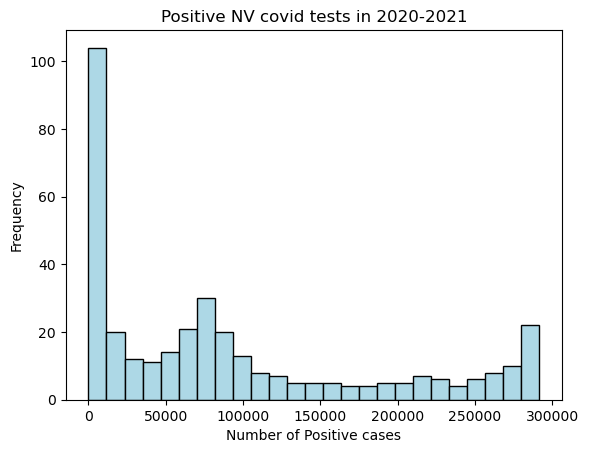

In [36]:
import matplotlib.pyplot as plt
import numpy as py

plt.hist(NV_covid_df['positive'], bins=25, color='lightblue', edgecolor='black')

# Add labels and title
plt.xlabel('Number of Positive cases')
plt.ylabel('Frequency')
plt.title('Positive NV covid tests in 2020-2021')

# Show the plot
plt.show()

### Adding a density plot

With an additional line of code we can add a density plot. The seaborn package is needed for the `sns` function applied below.

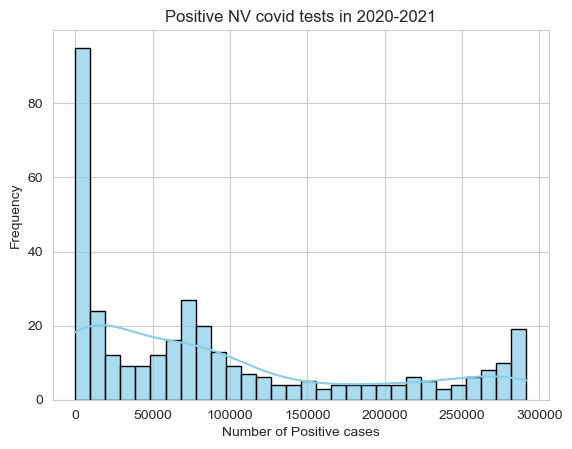

In [41]:
import seaborn as sns

#sns.set_style('whitegrid') turning this on 
sns.histplot(NV_covid_df['positive'], bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
# Add labels and title
plt.xlabel('Number of Positive cases')
plt.ylabel('Frequency')
plt.title('Positive NV covid tests in 2020-2021')

# Show the plot
plt.show()# Creating a customized histogram with a density plot


## Scatter plots

Scatter plots are generally easiest with `plt.scatter`

Plot options include:

Size (`s`): The values are interpreted as areas, so the size grows quadratically.

Color (`c`): Can be a single color (e.g., 'blue'), a list of colors (e.g., ['red', 'blue']) or a colormap if you pass numeric values (e.g., using c=values and adding cmap='viridis').

Other Useful Options:

`alpha`: Controls transparency.
 
`edgecolors`: Adds borders around points.

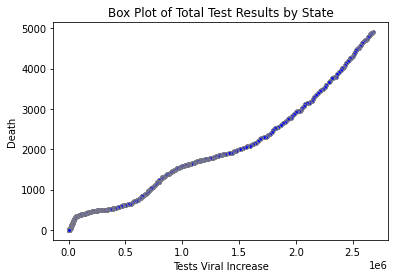

In [52]:
import matplotlib.pyplot as plt
import numpy as np


plt.scatter(y=NV_covid_df['death'], x=NV_covid_df['totalTestResults'], color='blue', edgecolor='gray', s=15)

# Label axes and plot
plt.title('Box Plot of Total Test Results by State')
plt.xlabel('Tests total')
plt.ylabel('Death')

plt.show()


## Using grouping variables to plot

Here lets read the covid data in, group data by state, and plot some of the variables across time.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

state_covid_sub_df = pd.read_csv('states_covid.csv',parse_dates=['date'],infer_datetime_format=True,index_col=None)
state_covid_sub_df.head()

/var/folders/m2/04t_0bnx1rv6940_lc07qdbm0000gn/T/ipykernel_5898/2964205761.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  state_covid_sub_df = pd.read_csv('states_covid.csv',parse_dates=['date'],infer_datetime_format=True,index_col=None)


date state    death  deathConfirmed  deathIncrease  deathProbable  \
0 2021-02-23    AK    290.0             NaN              0            NaN   
1 2021-02-23    AL   9660.0          7575.0             68         2085.0   
2 2021-02-23    AR   5377.0          4321.0             14         1056.0   
3 2021-02-23    AS      0.0             NaN              0            NaN   
4 2021-02-23    AZ  15650.0         13821.0            148         1829.0   

   hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
0        1260.0                  1260.0                   38.0   
1       45250.0                 45250.0                  762.0   
2       14617.0                 14617.0                  545.0   
3           NaN                     NaN                    NaN   
4       57072.0                 57072.0                 1515.0   

   hospitalizedIncrease  ...  totalTestResults  totalTestResultsIncrease  \
0                     9  ...         1653425.0                      4640   
1                   122  ...         2265086.0                      4825   
2                    47  ...         2609837.0                      4779   
3                     0  ...            2140.0                         0   
4                    78  ...         7478323.0                     19439   

   totalTestsAntibody  totalTestsAntigen  totalTestsPeopleAntibody  \
0                 NaN                NaN                       NaN   
1                 NaN                NaN                  115256.0   
2                 NaN                NaN                       NaN   
3                 NaN                NaN                       NaN   
4            435091.0                NaN                       NaN   

   totalTestsPeopleAntigen  totalTestsPeopleViral  \
0                      NaN                    NaN   
1                      NaN              2265086.0   
2                 436309.0                    NaN   
3                      NaN                    NaN   
4                      NaN              3709365.0   

   totalTestsPeopleViralIncrease  totalTestsViral  totalTestsViralIncrease  
0                              0        1653425.0                     4640  
1                           4825              NaN                        0  
2                              0        2609837.0                     4779  
3                              0           2140.0                        0  
4                           6212        7478323.0                    19439  

[5 rows x 41 columns]

### Using grouping variables to plot

Below Ive illustrated some options for visualizing state level data for one variable at t a time. This might give you an idea of how versatile data visualization can be in python, how easy it can be, and how nice you can make figures look. First, lets group by state and make box plots.

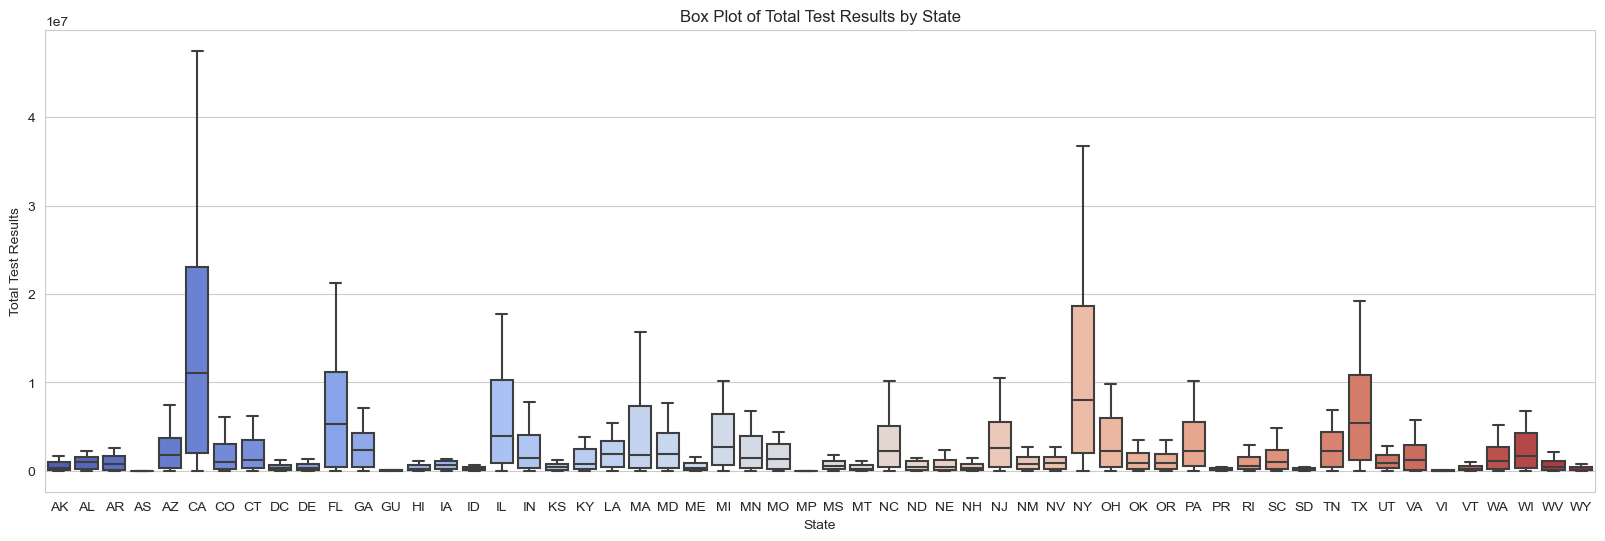

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))  # Set the size of the plot
#sns.boxplot(x='state', y='totalTestResults', color= 'lavender', data=state_covid_sub_df)
sns.boxplot(x='state', y='totalTestResults', data=state_covid_sub_df, palette='coolwarm', fliersize=5)

# Labels
plt.title('Box Plot of Total Test Results by State')
plt.xlabel('State')
plt.ylabel('Total Test Results')

# Display the plot
plt.show()

#### The below code sorts states by medians, adds strip plots, rotates the x axis, changes y to logarithmic, and highlights outliers.

#### A more appealing way to show this data might be with a strip plot which can also be done with seaborn:

/var/folders/m2/04t_0bnx1rv6940_lc07qdbm0000gn/T/ipykernel_5898/3924560637.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='state', y='totalTestResults', data=state_covid_sub_df, palette='Set1', jitter=True, alpha=0.5, linewidth=.04)


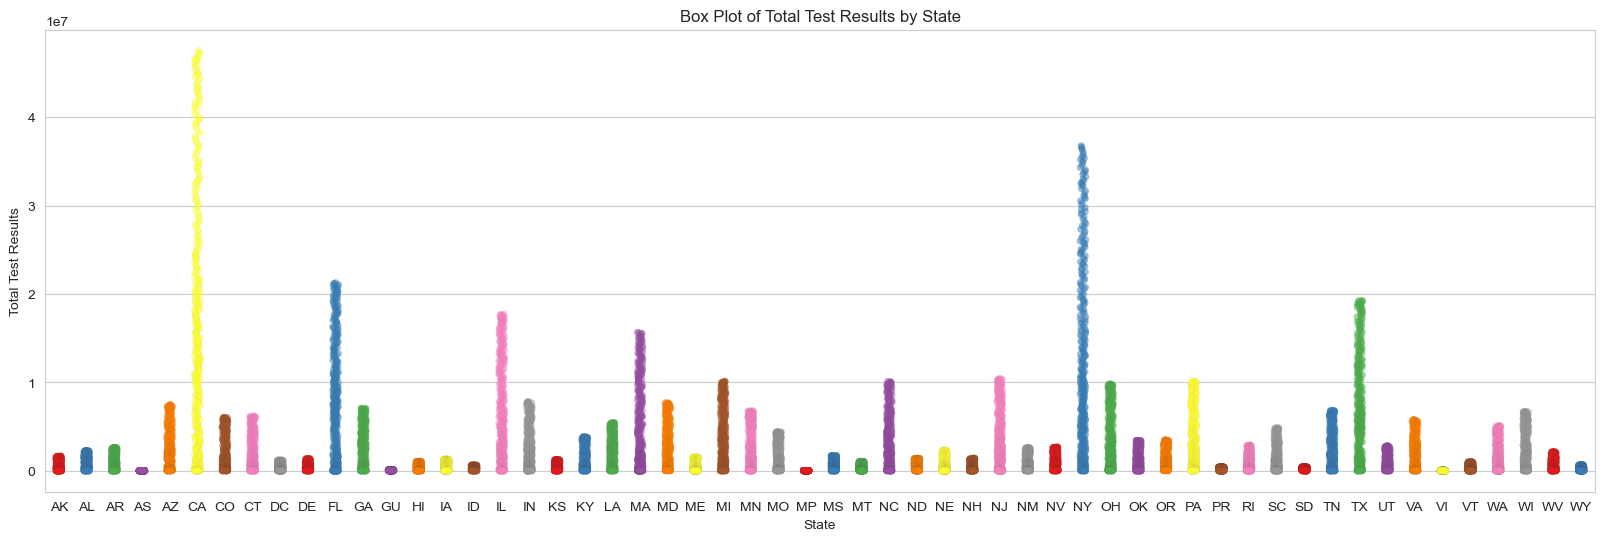

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot
plt.figure(figsize=(20, 6))  # Set the size of the plot
sns.stripplot(x='state', y='totalTestResults', data=state_covid_sub_df, palette='Set1', jitter=True, alpha=0.5, linewidth=.04)

# Customize the plot (optional)
plt.title('Box Plot of Total Test Results by State')
plt.xlabel('State')
plt.ylabel('Total Test Results')

# Display the plot
plt.show()

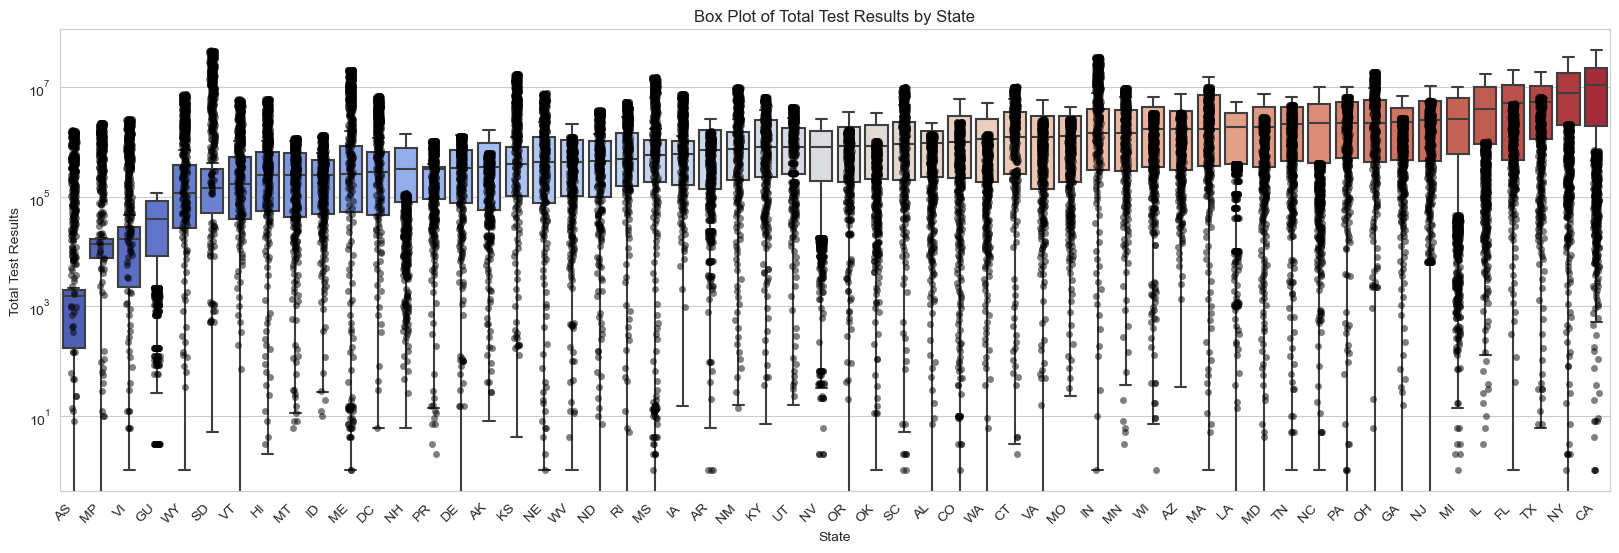

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))  # Set the size of the plot

# Sort states by median total test results
state_order = state_covid_sub_df.groupby('state')['totalTestResults'].median().sort_values().index

# Create the box plot with additional enhancements
sns.boxplot(x='state', y='totalTestResults', data=state_covid_sub_df, 
            order=state_order, palette='coolwarm')

# Add a strip plot for data points
sns.stripplot(x='state', y='totalTestResults', data=state_covid_sub_df, 
              color='black', jitter=True, alpha=0.5)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add a logarithmic scale for y-axis (if applicable)
plt.yscale('log')
plt.ylabel('Total Test Results (Log Scale)')

# Add title and labels
plt.title('Box Plot of Total Test Results by State')
plt.xlabel('State')
plt.ylabel('Total Test Results')

# Show the plot
plt.show()


#### plots can be written to files using `plt.savefig`

Usage: `plt.savefig('filename.pdf', format='pdf')`

- You can specify a different path and filename if desired.
- The format='pdf' argument is one option, others include .png, .jpeg, .svg, etc.
- `dpi` is used to specify dots per inch, effects file size.

In [ ]:
plt.savefig('violin_plot_eg.pdf', bbox_inches='tight', dpi=300)

#### Line plots of totalTestResults by state

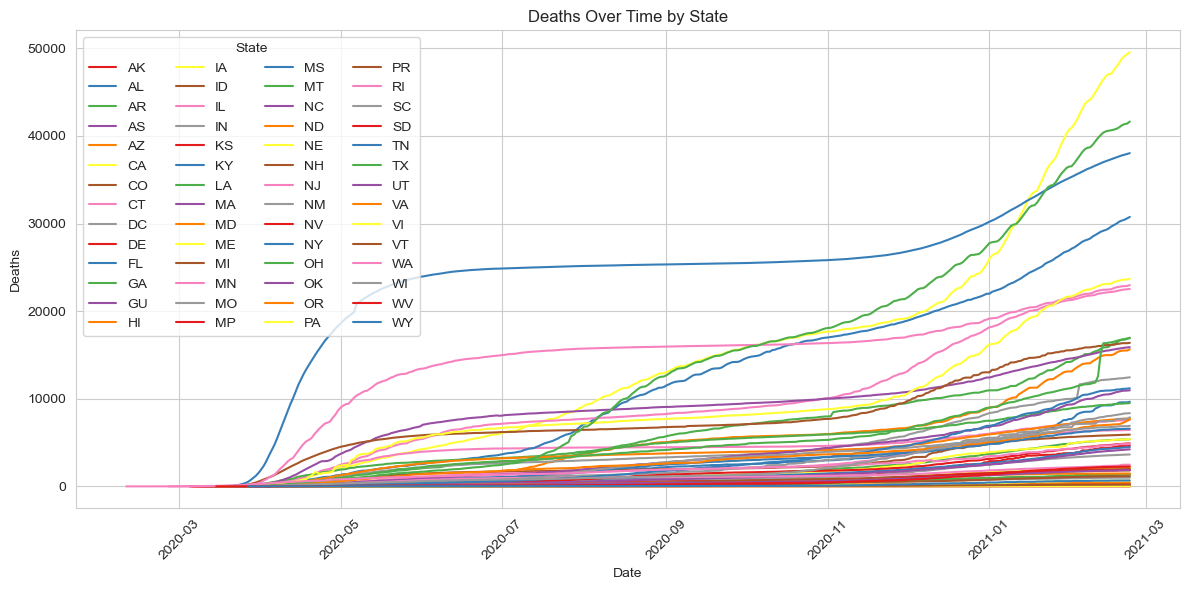

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the line plot
plt.figure(figsize=(12, 6))  # Set the size of the plot
#sns.lineplot(x='date', y='death', hue='state', palette='Set1', data=state_covid_sub_df, markers=True)
sns.lineplot(x='date', y='death', hue='state', palette='Set1', data=state_covid_sub_df, markers='o', markerfacecolor='red', markeredgewidth=2)

# Customize the plot
plt.title('Deaths Over Time by State')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend(title='State', ncol=4, loc='upper left') 

# Display the plot
plt.tight_layout()
plt.show()

#### We could look at the same data with seaborn's `FacetGrid`, which will create separate plots for each state:

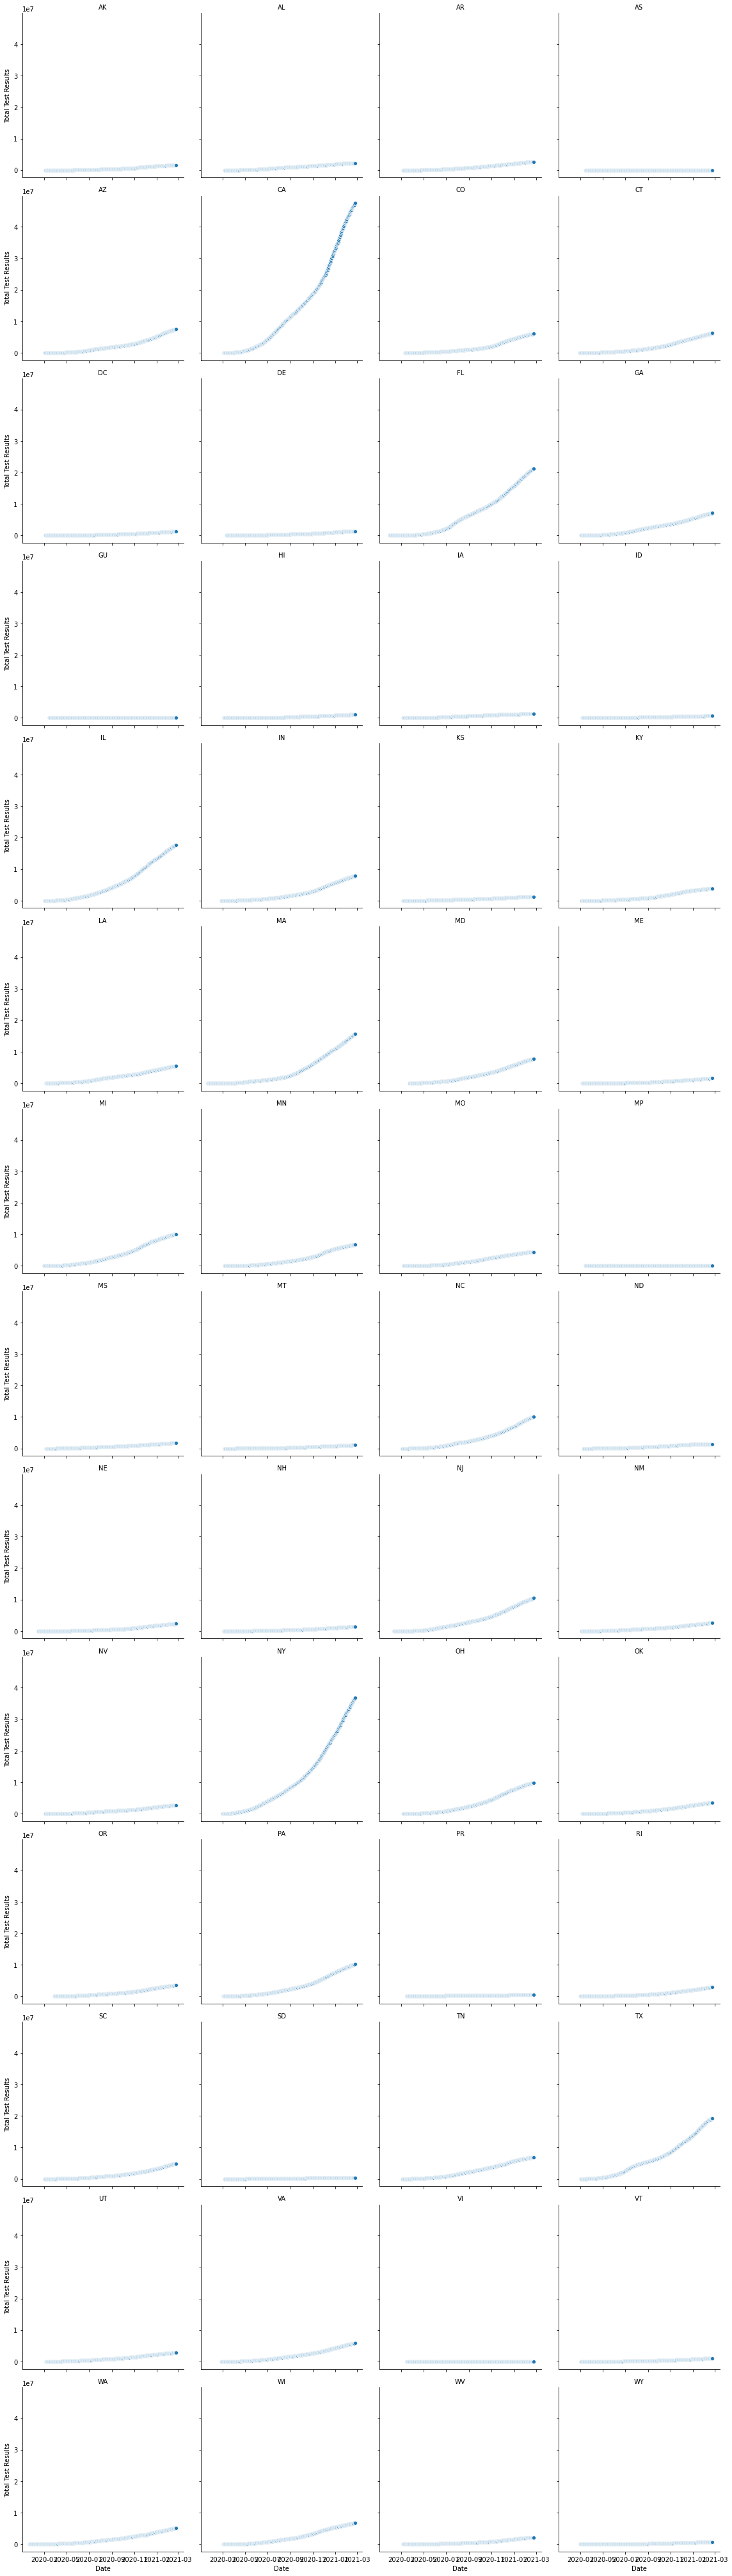

In [92]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


g = sns.FacetGrid(state_covid_sub_df, col="state", col_wrap=4, height=4)
g.map(sns.lineplot, "date", "totalTestResults", marker='o')

g.set_axis_labels("Date", "Total Test Results")
g.set_titles("{col_name}")

plt.tight_layout()
plt.show()


#### Choropleth maps provide a geographical representation of your data, with each state represented by a color intensity based on totalTestResults. This is especially useful for showing state-wise data geographically.

In [68]:
import plotly.express as px

fig = px.choropleth(state_covid_sub_df, locations="state", locationmode="USA-states",
                    color="totalTestResults", hover_name="state",
                    color_continuous_scale="Plasma", 
                    labels={"totalTestResults": "Total Test Results"})

fig.update_layout(title_text="Total Test Results by State (Choropleth)",
                  geo=dict(scope='usa'))
fig.show()


#### Bubble map using px

In [71]:
import plotly.express as px

fig = px.scatter_geo(state_covid_sub_df, locations="state", locationmode="USA-states",
                     size="totalTestResults", hover_name="state",
                     color="totalTestResults", color_continuous_scale="Plasma",
                     title="Bubble Map of Total Test Results by State")

fig.update_layout(geo=dict(scope='usa'))
fig.show()

In [70]:
import plotly.express as px

fig = px.bar(state_covid_sub_df, x='totalTestResults', y='state', 
             orientation='h', color='totalTestResults', 
             color_continuous_scale='Viridis', 
             labels={'totalTestResults': 'Total Test Results', 'state': 'State'},
             title='Total Test Results by State')

fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()

Remember that python has great built in date attributes. Plot deaths by day and find the days with the most deaths 

death    negative   positive  totalTestResults
date                                                     
Tuesday  79269.0  26076775.0  4805720.0        50582871.0

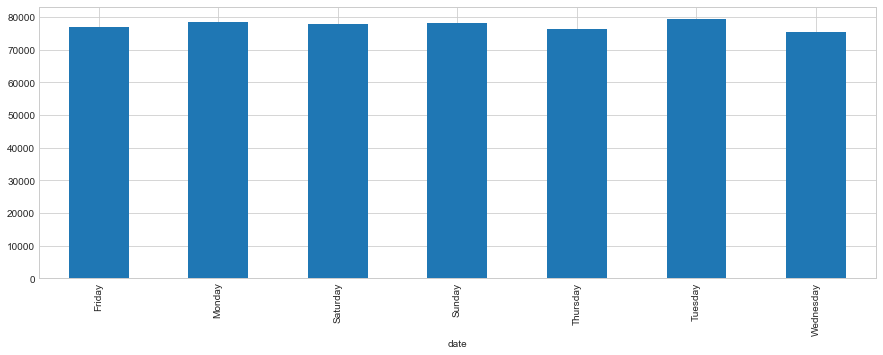

In [154]:
#### deaths by day of the week ####
weekday_counts = NV_covid_df.groupby(NV_covid_df['date'].dt.day_name()).aggregate(sum)
weekday_counts

weekday_counts.death.plot(kind='bar')

weekday_counts[weekday_counts.death == weekday_counts.death.max()]

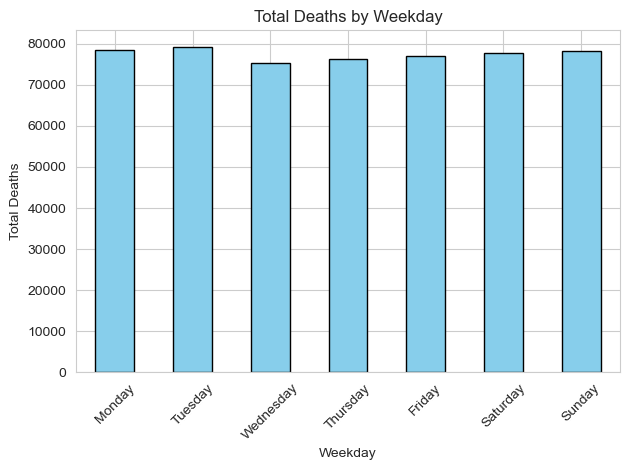

Day with maximum deaths:
           death
date            
Tuesday  79269.0


In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'date' column is in datetime format
NV_covid_df['date'] = pd.to_datetime(NV_covid_df['date'])

# Group by day of the week and sum the 'death' column
weekday_counts = NV_covid_df.groupby(NV_covid_df['date'].dt.day_name()).agg({'death': 'sum'})

# Reorder the weekdays
weekday_counts = weekday_counts.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot the bar chart for death counts by weekday
weekday_counts.death.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Deaths by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find the weekday with the highest number of deaths
max_death_day = weekday_counts[weekday_counts.death == weekday_counts.death.max()]
print("Day with maximum deaths:")
print(max_death_day)


Days with most deaths are **Tuesday**. Anyone know why? "most places are closed on the weekend, many counts are reports happen on monday" 

### Other useful libraries

- BioPython / SeqIO (molecular biology)
- scikit-learn (statistics and machine learning)
- TenserFlow (Deep Learning)
- BeautifulSoup (Scraping HTML)
- seaborn (extension of matplotlib)
- plotly (more ploting)
- iPython (notebooks / will go over in Julie's course)
- r2py (run R script within python)
- literally anything you can think of, a library exists for it
